# explore_EV_title_and_registration_activity.ipynb
**Early notebook used to gain some initial insights into the EV title and registration activity.**
+ Contains various lines of code to understand how many records there are by EV type or transaction type.
+ Can also be used to create some basic plots of the EV title and registration activity and the properties of the EVs recorded in this dataset.

In [108]:
import requests
import pandas as pd
import numpy as np
import datetime as dt

In [49]:
df = pd.read_csv("data/Electric_Vehicle_Title_and_Registration_Activity.csv", parse_dates=["DOL Transaction Date"])

df.head()

,Clean Alternative Fuel Vehicle Type,VIN (1-10),Model Year,Make,Model,New or Used Vehicle,Sale Price,DOL Transaction Date,Transaction Type,Transaction Year,...,DOL Vehicle ID,Legislative District,2019 HB 2042 Clean Alternative Fuel Vehicle (CAFV) Eligibility,Meets 2019 HB 2042 Electric Range Requirement,Meets 2019 HB 2042 Sale Date Requirement,Meets 2019 HB 2042 Sale Price/Value Requirement,Odometer Reading,Odometer Code,Transportation Electrification Fee Paid,Hybrid Vehicle Electrification Fee Paid
0,Battery Electric Vehicle (BEV),1N4BZ0CP9G,2016,NISSAN,Leaf,New,27300,2017-02-08,Original Title,2017,...,109741460,45.0,TRANSACTION NOT ELIGIBLE: Sale before August 2019,True,False,True,11,Actual Mileage,Not Applicable,Not Applicable
1,Battery Electric Vehicle (BEV),1N4BZ0CP9G,2016,NISSAN,Leaf,New,0,2017-02-08,Original Registration,2017,...,109741460,45.0,"TRANSACTION NOT ELIGIBLE: Non-sale, registrati...",True,False,False,0,Odometer reading is not collected at time of r...,No,No
2,Battery Electric Vehicle (BEV),5YJSA1H11E,2014,TESLA,MODEL S,Used,0,2017-01-12,Registration Renewal,2017,...,8038859,37.0,"TRANSACTION NOT ELIGIBLE: Non-sale, registrati...",True,False,False,0,Odometer reading is not collected at time of r...,No,No
3,Plug-in Hybrid Electric Vehicle (PHEV),WBY1Z4C58E,2014,BMW,i3,Used,0,2017-03-01,Registration Renewal,2017,...,106950455,36.0,"TRANSACTION NOT ELIGIBLE: Non-sale, registrati...",True,False,False,0,Odometer reading is not collected at time of r...,No,No
4,Battery Electric Vehicle (BEV),1N4AZ0CP3D,2013,NISSAN,Leaf,Used,8070,2017-02-06,Transfer Title,2017,...,220972720,49.0,TRANSACTION NOT ELIGIBLE: Sale before August 2019,True,False,True,38791,Actual Mileage,Not Applicable,Not Applicable


In [50]:
df.columns

Index(['Clean Alternative Fuel Vehicle Type', 'VIN (1-10)', 'Model Year',
       'Make', 'Model', 'New or Used Vehicle', 'Sale Price',
       'DOL Transaction Date', 'Transaction Type', 'Transaction Year',
       'Electric Vehicle Fee Paid', 'County', 'City', 'Zip', 'Electric Range',
       'Base MSRP', '2015 HB 2778 Exemption Eligibility', 'Sale Date',
       'Vehicle Primary Use', 'State of Residence', 'DOL Vehicle ID',
       'Legislative District',
       '2019 HB 2042 Clean Alternative Fuel Vehicle (CAFV) Eligibility',
       'Meets 2019 HB 2042 Electric Range Requirement',
       'Meets 2019 HB 2042 Sale Date Requirement',
       'Meets 2019 HB 2042 Sale Price/Value Requirement', 'Odometer Reading',
       'Odometer Code', 'Transportation Electrification Fee Paid',
       'Hybrid Vehicle Electrification Fee Paid'],
      dtype='object')

In [192]:
# Original Registration
# Original Title
# Transfer Title
# Registration at time of Transfer
# Registration Renewal
print(df.shape)
print("Year of 'DOL Transaction Date' always equal to 'Transaction Year'?", (df["DOL Transaction Date"].dt.year == df["Transaction Year"]).all())
print("Number of different VIN (1-10)s:", len(df["VIN (1-10)"].unique()))
# print("# Original Registrations:", len(df[df["Transaction Type"] == "Original Registration"]))
# print("# Original Registrations or Registration at time of Transfer:", len(df[df["Transaction Type"].isin(["Original Registration", "Registration at time of Transfer"])]))
# print("# Registrations Renewals:", len(df[df["Transaction Type"] == "Registration Renewal"]))
#print("#BEVs:", df[df["Clean Alternative Fuel Vehicle Type"] == "Battery Electric Vehicle (BEV)"])
print("# Transactions by type:", df.groupby("Transaction Type").size())
print("# EVs by type:", df.groupby("Clean Alternative Fuel Vehicle Type").size())
print("# EVs by type:", df.groupby(["Transaction Type", "Clean Alternative Fuel Vehicle Type"]).size())
print("# EVs by type:", df.groupby(["Transaction Type", "Clean Alternative Fuel Vehicle Type"]).size()/df.groupby("Transaction Type").size())

(502411, 30)
Year of 'DOL Transaction Date' always equal to 'Transaction Year'? True
Number of different VIN (1-10)s: 6080
# Transactions by type: Transaction Type
Original Registration               109890
Original Title                      108751
Registration Renewal                231146
Registration at time of Transfer     25460
Transfer Title                       27164
dtype: int64
# EVs by type: Clean Alternative Fuel Vehicle Type
Battery Electric Vehicle (BEV)            354286
Plug-in Hybrid Electric Vehicle (PHEV)    148125
dtype: int64
# EVs by type: Transaction Type                  Clean Alternative Fuel Vehicle Type   
Original Registration             Battery Electric Vehicle (BEV)             80808
                                  Plug-in Hybrid Electric Vehicle (PHEV)     29082
Original Title                    Battery Electric Vehicle (BEV)             80164
                                  Plug-in Hybrid Electric Vehicle (PHEV)     28587
Registration Renewal      

In [184]:
109890-87686,89107+20783,109890-25460

(22204, 109890, 84430)

In [187]:
print(64647/87685) #pop_size_history
print(80808/109890) #derived from title+reg. activity

0.7372640702514683
0.7353535353535353


In [179]:
tmp = df[df["Transaction Type"].str.contains("Renewal")]
print(tmp.groupby("Transaction Type").size())
print(tmp.groupby(["New or Used Vehicle", "Transaction Type"]).size())

Transaction Type
Registration Renewal    231146
dtype: int64
New or Used Vehicle  Transaction Type    
Used                 Registration Renewal    231146
dtype: int64


In [57]:
date_range = [dt.datetime(y,m,1) for y in range(2010,2023) for m in range(1,13)]

df["DOL Transaction Date"].describe()
#date_range

C:\Users\steff\AppData\Local\Temp/ipykernel_15892/3899826704.py:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df["DOL Transaction Date"].describe()


count                  502411
unique                   3355
top       2020-11-02 00:00:00
freq                     1363
first     2010-01-06 00:00:00
last      2021-12-30 00:00:00
Name: DOL Transaction Date, dtype: object

In [159]:
# df_plot = df
df_plot = df[df["County"] == "Pierce"]
# df_plot = df[df["Zip"] == 98119]
df_plot = df_plot[df_plot["Clean Alternative Fuel Vehicle Type"]=="Battery Electric Vehicle (BEV)"]
df_plot.shape

(23386, 30)

array([[<AxesSubplot:title={'center':'Sale Price'}>]], dtype=object)

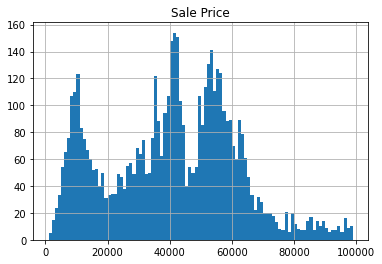

In [165]:
# df_plot.hist("DOL Transaction Date", by="Zip", bins=date_range, figsize=(18,5))
# df_plot[df_plot["Zip"] < 98300].hist("DOL Transaction Date", by="Zip", bins=date_range, figsize=(18,5))
df_plot[df_plot["Sale Price"]>0].hist("Sale Price", bins=range(1000,100000,1000))

In [168]:
# transfer_title_ind = df.index[df["Transaction Type"] == "Original Title"]
transfer_title_ind = df.index[df["Transaction Type"] == "Transfer Title"]
# transfer_title_ind = df.index[df["Transaction Type"] == "Original Registration"]
# transfer_title_ind = df.index[df["Transaction Type"] == "Registration Renewal"]
# transfer_title_ind = df.index[df["Transaction Type"] == "Registration at time of Transfer"]
print(transfer_title_ind)
#transfer_title_ind, transfer_title_ind[4]
transfer_related_index = []
for i in transfer_title_ind:
    #print(i)
#     if df.loc[i,"VIN (1-10)"] == df.loc[i+1,"VIN (1-10)"]:
    if df.loc[i,"VIN (1-10)"] == df.loc[i+1,"VIN (1-10)"] and df.loc[i,"DOL Transaction Date"] == df.loc[i+1,"DOL Transaction Date"]:
        #print(i,i+1)
        transfer_related_index += [i+1]
#     elif df.loc[i,"VIN (1-10)"] == df.loc[i-1,"VIN (1-10)"]:
    elif df.loc[i,"VIN (1-10)"] == df.loc[i-1,"VIN (1-10)"] and df.loc[i,"DOL Transaction Date"] == df.loc[i-1,"DOL Transaction Date"]:
        #print(i,i-1)
        transfer_related_index += [i-1]

transfer_related_index
d = df.loc[transfer_related_index, ["VIN (1-10)", "DOL Transaction Date", "Transaction Type"]]
print(d.head())
print(d.groupby("Transaction Type").size())

Int64Index([     4,      8,     26,     29,     44,     55,     58,     63,
                78,     83,
            ...
            502019, 502052, 502103, 502110, 502167, 502215, 502217, 502222,
            502277, 502343],
           dtype='int64', length=27164)
    VIN (1-10) DOL Transaction Date                  Transaction Type
9   WP1AE2A2XF           2017-05-23  Registration at time of Transfer
27  1N4AZ0CP6D           2017-04-11  Registration at time of Transfer
28  3FA6P0SU5H           2017-04-11  Registration at time of Transfer
45  1N4AZ0CP1D           2017-01-03  Registration at time of Transfer
56  1N4AZ0CP0D           2017-01-10  Registration at time of Transfer
Transaction Type
Registration Renewal                    1
Registration at time of Transfer    22823
dtype: int64


In [91]:
url = "https://data.wa.gov/resource/f6w7-q2d2.csv"
params = { }
# params = {"$select" : "County"}
params = {"$limit" : 100000}
r = requests.get(url, stream=True, params=params)
# r.status_code, r.text
r.url

# data = pd.read_csv(r.url)
# print(data.shape)

filename = "ev_pop_data.csv"
with open(filename, "wb") as fd:
    for chunk in r.iter_content(chunk_size=128):
        fd.write(chunk)

In [220]:
#create count of BEVs in each ZIP code based on "Original Registration" for each month since Jan 2017
times = [(y, m) for y in range(2017,2022) for m in range(1,13)]
zip_codes = df["Zip"].unique()
# zip_codes = zip_codes[zip_codes>99800]
multiindex = pd.MultiIndex.from_product([times, zip_codes], names=["time", "zip"])
final_df = pd.DataFrame(index=multiindex)
# final_df.head(20)
for t in times:
    #print(df.groupby("Zip").size())
    final_df[t] = df.groupby("Zip").size()
# keep a dataframe containing all entries for each zip code at each step in time

In [221]:
final_df.head()

(2017, 1)  (2017, 2)  (2017, 3)  (2017, 4)  (2017, 5)  \
time      zip                                                              
(2017, 1) 98052.0        NaN        NaN        NaN        NaN        NaN   
          98144.0        NaN        NaN        NaN        NaN        NaN   
          98199.0        NaN        NaN        NaN        NaN        NaN   
          98660.0        NaN        NaN        NaN        NaN        NaN   
          98136.0        NaN        NaN        NaN        NaN        NaN   

                   (2017, 6)  (2017, 7)  (2017, 8)  (2017, 9)  (2017, 10)  \
time      zip                                                               
(2017, 1) 98052.0        NaN        NaN        NaN        NaN         NaN   
          98144.0        NaN        NaN        NaN        NaN         NaN   
          98199.0        NaN        NaN        NaN        NaN         NaN   
          98660.0        NaN        NaN        NaN        NaN         NaN   
          98136.0        NaN        NaN        NaN        NaN         NaN   

                   ...  (2021, 3)  (2021, 4)  (2021, 5)  (2021, 6)  (2021, 7)  \
time      zip      ...                                                          
(2017, 1) 98052.0  ...        NaN        NaN        NaN        NaN        NaN   
          98144.0  ...        NaN        NaN        NaN        NaN        NaN   
          98199.0  ...        NaN        NaN        NaN        NaN        NaN   
          98660.0  ...        NaN        NaN        NaN        NaN        NaN   
          98136.0  ...        NaN        NaN        NaN        NaN        NaN   

                   (2021, 8)  (2021, 9)  (2021, 10)  (2021, 11)  (2021, 12)  
time      zip                                                                
(2017, 1) 98052.0        NaN        NaN         NaN         NaN         NaN  
          98144.0        NaN        NaN         NaN         NaN         NaN  
          98199.0        NaN        NaN         NaN         NaN         NaN  
          98660.0        NaN        NaN         NaN         NaN         NaN  
          98136.0        NaN        NaN         NaN         NaN         NaN  

[5 rows x 60 columns]